In [8]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import os
import glob
import matplotlib
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
from matplotlib.pyplot import imshow

from pdb import set_trace

In [9]:
# Prepare variables
data_dir = '../dataturks/pascalVOC/gs/'

### Number of images must equals to Number of xmls

In [14]:
image_paths = [f.replace('\\', '/') for f in glob.glob(data_dir + '*.jpg')]
xml_paths = [f.replace('\\', '/') for f in glob.glob(data_dir + '*.xml')]

n_images = len(image_paths)
n_xmls = len(xml_paths)
print(f"Number of images = {n_images}, Number of xmls = {n_xmls}")

Number of images = 1554, Number of xmls = 1554


### No .txt file

In [15]:
txt_files = [os.path.basename(f) for f in glob.glob(xmls_dir + '**/*.txt')]

print(f"Text files : {txt_files}")

Text files : []


### Validate  labels

In [16]:
#labels mush be unique
def is_valid_char_label(char_label):
    is_thai_letter = ord(char_label) in range(ord('ก'), ord('ฮ')+1)
    is_digit = ord(char_label) in range(ord('0'), ord('9')+1)
    return is_digit or is_thai_letter
char_label_set = set()

for xml_path in xml_paths:
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    for obj in root.findall('object'):
        label = obj.find('name').text
        char_label_set.add(label)

print("All possible labels")            
print(sorted(list(char_label_set)))
print(f"{len(char_label_set)}")

All possible labels
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'benz', 'bmw', 'chevtolet', 'ford', 'honda', 'hyundai', 'isuzu', 'kia', 'lexus', 'mazda', 'mg', 'minicooper', 'misubishi', 'nissan', 'plate', 'subaru', 'suzuki', 'toyota', 'volvo', 'ก', 'ข', 'ฃ', 'ค', 'ฆ', 'ง', 'จ', 'ฉ', 'ช', 'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท', 'ธ', 'น', 'บ', 'ป', 'ผ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ล', 'ว', 'ศ', 'ษ', 'ส', 'ห', 'ฬ', 'อ', 'ฮ']
70


### List Duplicate images and xmls

In [17]:
from collections import Counter
import re

def getFileName(filePath):
    pattern = r'.+(?=\.[jpx])'
    return re.findall(pattern, os.path.basename(filePath))[0]

image_names = [getFileName(image_path) for image_path in image_paths]
duplicated_image = [count for item, count in Counter(image_names).items() if count > 1]
print("Duplicated Images = ", duplicated_image)

xml_names = [getFileName(xml_path) for xml_path in xml_paths]
duplicated_xml = [count for item, count in Counter(xml_names).items() if count > 1]
print("Duplicated Xmls = ", duplicated_xml)

Duplicated Images =  []
Duplicated Xmls =  []


### Check image missing xml AND xml missing image

In [7]:
print("Image which missing xml ", set(image_names) - set(xml_names))
print("Xml which missing image ", set(xml_names) - set(image_names))

Image which missing xml  set()
Xml which missing image  set()


### Plotting Bounding Box

In [10]:
output_dir = './tmp'
font_dir = './fonts/angsa.ttf'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_bbox(image_path, font):
    image_name =getFileName(image_path)
    
    # Prepare image
    image = Image.open(image_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    drawer = ImageDraw.Draw(image)    
    
    # Prepare Ground Truth
    xml_path  = os.path.join(xmls_dir, image_name + '.xml')
    
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    objects = [obj for obj in root.findall('object')]
    
    for obj in objects:
        label = obj.find('name').text
    
        xmin = float(obj.find('bndbox').find('xmin').text)
        ymin = float(obj.find('bndbox').find('ymin').text)
        xmax = float(obj.find('bndbox').find('xmax').text)
        ymax = float(obj.find('bndbox').find('ymax').text)
        
        drawer.line([(xmin, ymin),
                     (xmax, ymin),
                     (xmax, ymax),
                     (xmin, ymax),
                     (xmin, ymin)], fill=(255,0,0), width=2)
        
        drawer.text((xmin + (xmax - xmin) / 2, ymax), label, font = font, fill=(255,0,0))
    return image

for image_path in image_paths:
    font = ImageFont.truetype(font_dir, 20)
    image = plot_bbox(image_path, font)
    #image.save(os.path.join(output_dir, getFileName(image_path) + '.jpg'))

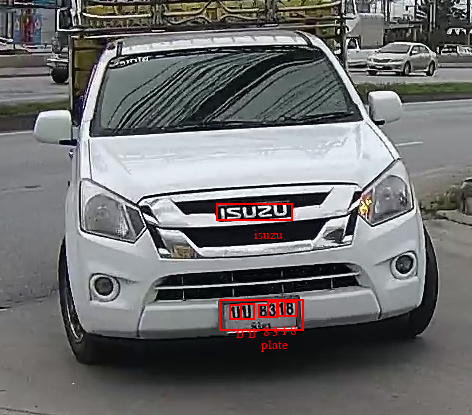

In [11]:
image